<a href="https://colab.research.google.com/github/hanmrf/MachineLearning/blob/main/Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

In [ ]:
# Impor library yang dibutuhkan
from IPython import get_ipython
from IPython.display import display
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageDraw, ImageOps # Impor Image dan ImageDraw dari PIL

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download muhammadraihanf12/agricurify-apple

Dataset URL: https://www.kaggle.com/datasets/muhammadraihanf12/agricurify-apple
License(s): unknown
100% 1.45G/1.46G [01:13<00:00, 22.9MB/s]
100% 1.46G/1.46G [01:13<00:00, 21.2MB/s]


In [ ]:
import zipfile

# Lokasi file ZIP
zip_file_path = "/content/agricurify-apple.zip"
extract_to_path = "/content/"

# Mengekstrak file ZIP
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
        print("File berhasil diekstrak ke direktori:", extract_to_path)
else:
    print("File ZIP tidak ditemukan di lokasi:", zip_file_path)

File berhasil diekstrak ke direktori: /content/


In [ ]:
import os
import shutil

# Daftar direktori dataset
dataset_dirs = [
    "/content/Non___Apple",
    "/content/Apple___healthy",
    "/content/Apple___Cedar_apple_rust",
    "/content/Apple___Black_rot",
    "/content/Apple___Apple_scab"
]

# Direktori tujuan untuk dataset gabungan
merged_dataset_dir = "/content/Merged_Apple"

# Buat direktori tujuan jika belum ada
os.makedirs(merged_dataset_dir, exist_ok=True)

# Salin gambar dari setiap direktori dataset ke direktori tujuan, pertahankan struktur kelas
for dataset_dir in dataset_dirs:
    # Dapatkan nama kelas dari nama direktori
    class_name = os.path.basename(dataset_dir)

    # Buat sub-direktori kelas di direktori tujuan jika belum ada
    target_class_dir = os.path.join(merged_dataset_dir, class_name)
    os.makedirs(target_class_dir, exist_ok=True)

    # Salin gambar dari direktori dataset ke sub-direktori kelas di direktori tujuan
    for filename in os.listdir(dataset_dir):
        src_path = os.path.join(dataset_dir, filename)
        dst_path = os.path.join(target_class_dir, filename)
        shutil.copy(src_path, dst_path)

print("Dataset telah digabungkan ke:", merged_dataset_dir)

Dataset telah digabungkan ke: /content/Merged_Apple


In [ ]:
apple_data = "/content/Merged_Apple"
apple_classes = os.listdir(apple_data)

print("apple_classes:")
for classes in apple_classes:
    if os.path.isdir(os.path.join(apple_data, classes)):
        print(classes)

apple_classes:
Non___Apple
Apple___Cedar_apple_rust
Apple___Black_rot
Apple___healthy
Apple___Apple_scab



Class Name: Non___Apple
Total Images: 6392
Resolution of First Image: (255, 170, 3)


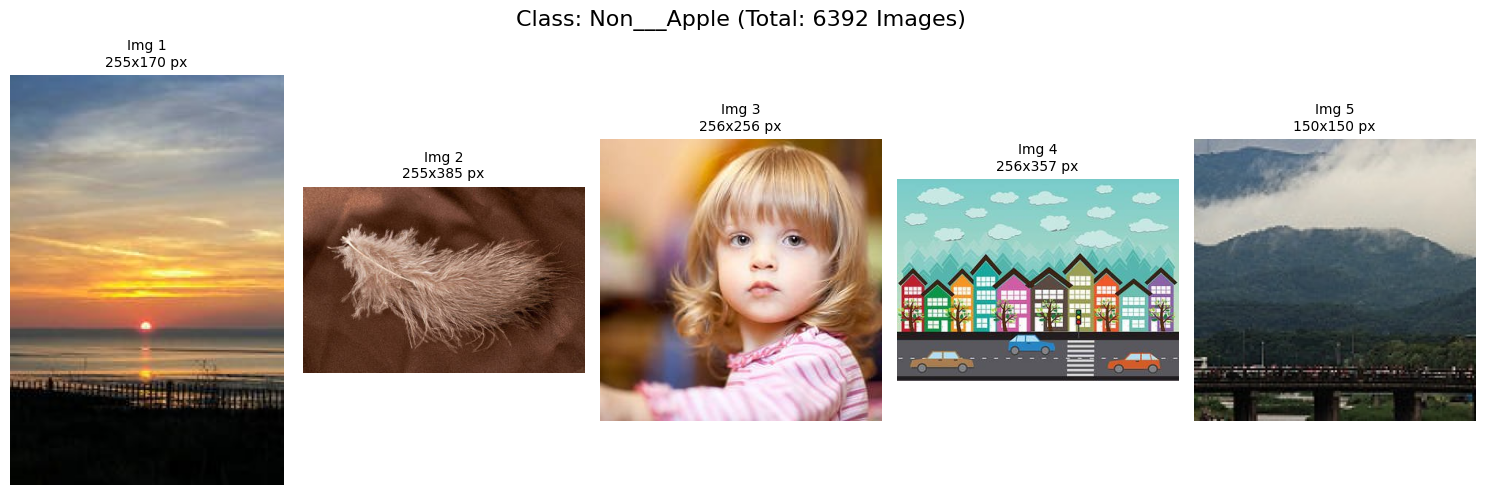


Class Name: Apple___Cedar_apple_rust
Total Images: 6438
Resolution of First Image: (256, 256, 3)


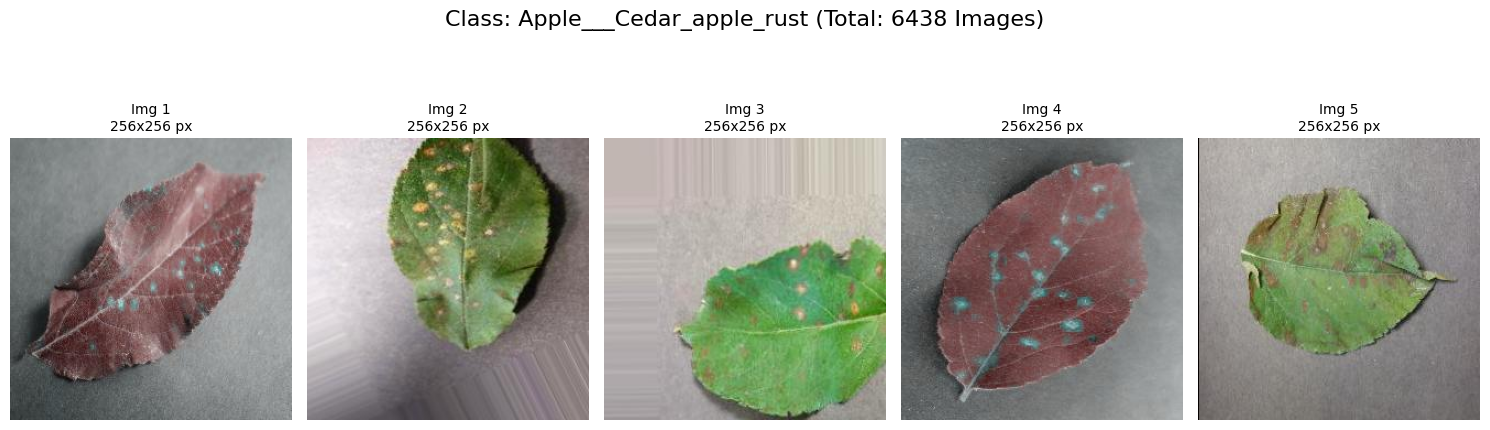


Class Name: Apple___Black_rot
Total Images: 6865
Resolution of First Image: (256, 256, 3)


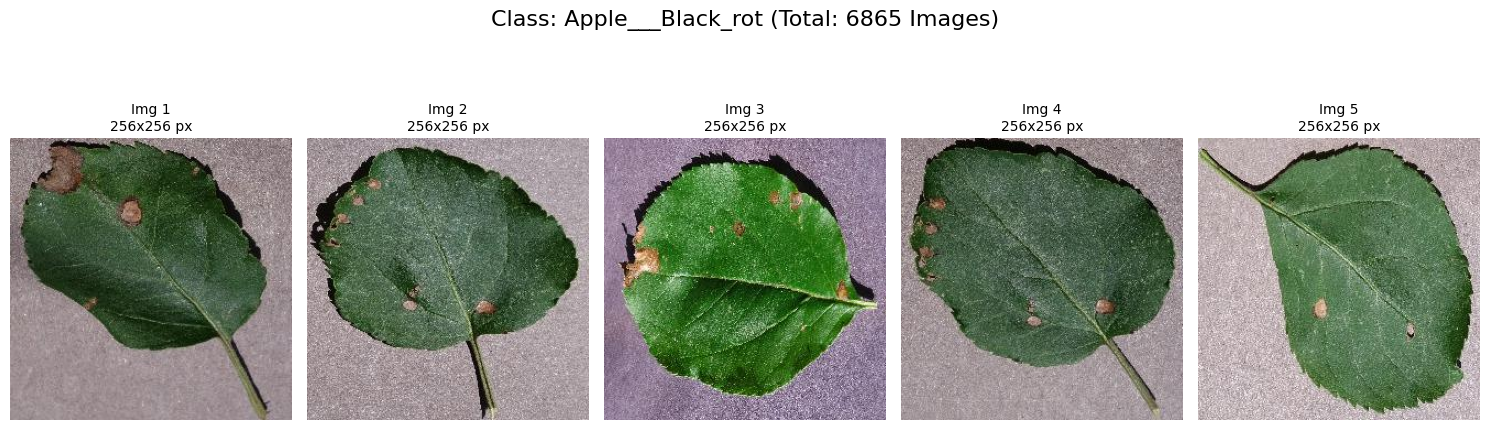


Class Name: Apple___healthy
Total Images: 6245
Resolution of First Image: (256, 256, 3)


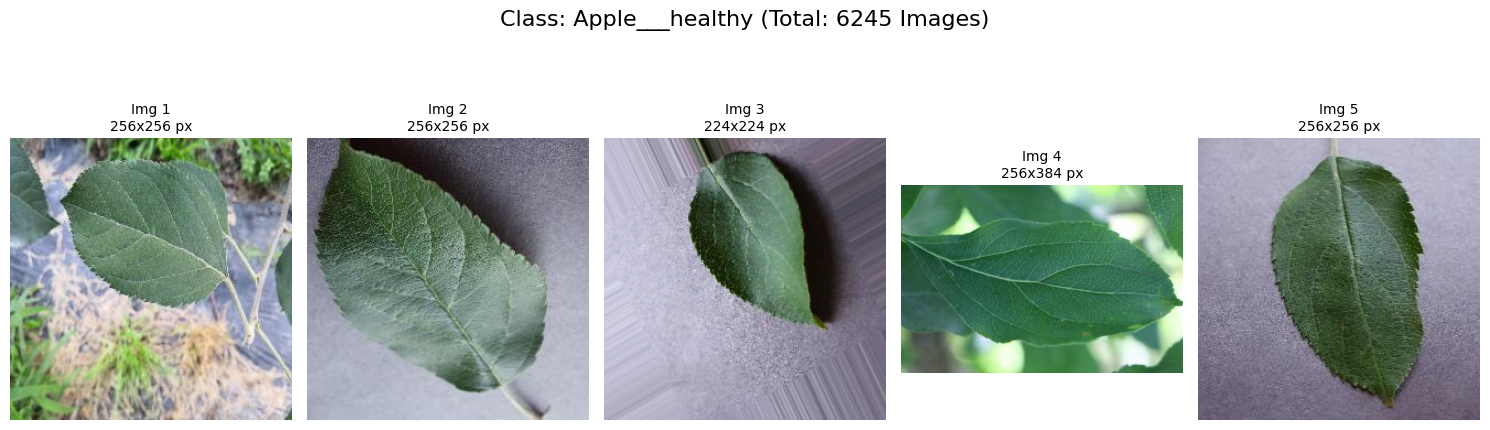


Class Name: Apple___Apple_scab
Total Images: 6048
Resolution of First Image: (256, 256, 3)


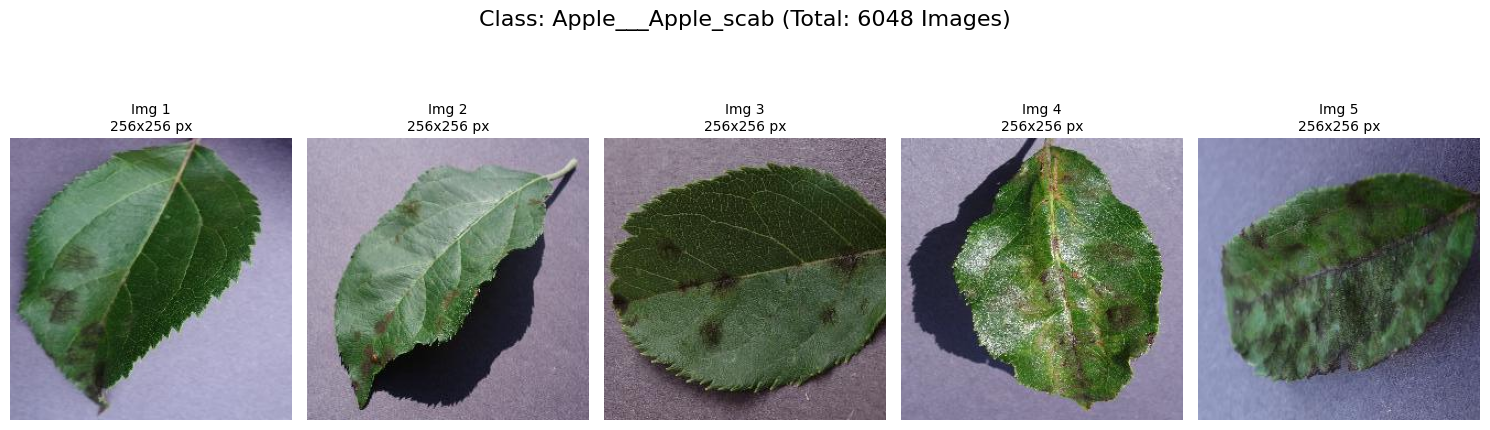

In [ ]:
for item in apple_classes:
    print("\nClass Name:", item)
    class_dir = os.path.join(apple_data, item)
    class_images = os.listdir(class_dir)

    # Total images in each class
    num_images = len(class_images)
    print("Total Images:", num_images)

    # Resolution/size of the first image in the class
    img_path = os.path.join(class_dir, class_images[0])
    img = mpimg.imread(img_path)
    image_shape = img.shape
    print("Resolution of First Image:", image_shape)

    # Displaying some images with descriptive labels
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Class: {item} (Total: {num_images} Images)", fontsize=16)

    for i, img_file in enumerate(class_images[:5]):  # Display up to 5 images
        img_path = os.path.join(class_dir, img_file)
        img = mpimg.imread(img_path)

        # Add a subplot for each image
        sp = plt.subplot(1, 5, i + 1)
        plt.axis('off')
        plt.imshow(img)

        # Add descriptive title to each image
        plt.title(f"Img {i+1}\n{img.shape[0]}x{img.shape[1]} px", fontsize=10)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust to fit the suptitle
    plt.show()

# Preprocesing Dataset

In [ ]:
# New Directory for Balanced Dataset
balanced_dir = "/content/balanced"

# Number of Images to Be Selected from Each Class
num_images_per_class = min(len(os.listdir(apple_data+"/Apple___Apple_scab")),
                           len(os.listdir(apple_data+"/Apple___Black_rot")),
                           len(os.listdir(apple_data+"/Apple___Cedar_apple_rust")),
                           len(os.listdir(apple_data+"/Apple___healthy")),
                           len(os.listdir(apple_data+"/Non___Apple")))

# Create New Directory in balanced_dir
os.makedirs(balanced_dir+"/Apple___Apple_scab", exist_ok=True)
os.makedirs(balanced_dir+"/Apple___Black_rot", exist_ok=True)
os.makedirs(balanced_dir+"/Apple___Cedar_apple_rust", exist_ok=True)
os.makedirs(balanced_dir+"/Apple___healthy", exist_ok=True)
os.makedirs(balanced_dir+"//Non___Apple", exist_ok=True)

# Select Some Images from Each Class and Copy to balanced_dir
selected_images = os.listdir(apple_data+"/Apple___Apple_scab")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(apple_data+"/Apple___Apple_scab", image), balanced_dir+"/Apple___Apple_scab")

selected_images = os.listdir(apple_data+"/Apple___Black_rot")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(apple_data+"/Apple___Black_rot", image), balanced_dir+"/Apple___Black_rot")

selected_images = os.listdir(apple_data+"/Apple___Cedar_apple_rust")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(apple_data+"/Apple___Cedar_apple_rust", image), balanced_dir+"/Apple___Cedar_apple_rust")

selected_images = os.listdir(apple_data+"/Apple___healthy")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(apple_data+"/Apple___healthy", image), balanced_dir+"/Apple___healthy")

selected_images = os.listdir(apple_data+"//Non___Apple")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(apple_data+"//Non___Apple", image), balanced_dir+"//Non___Apple")

Preview Gambar dari Dataset yang Seimbang:

Kelas: Non___Apple
Total Gambar: 6048


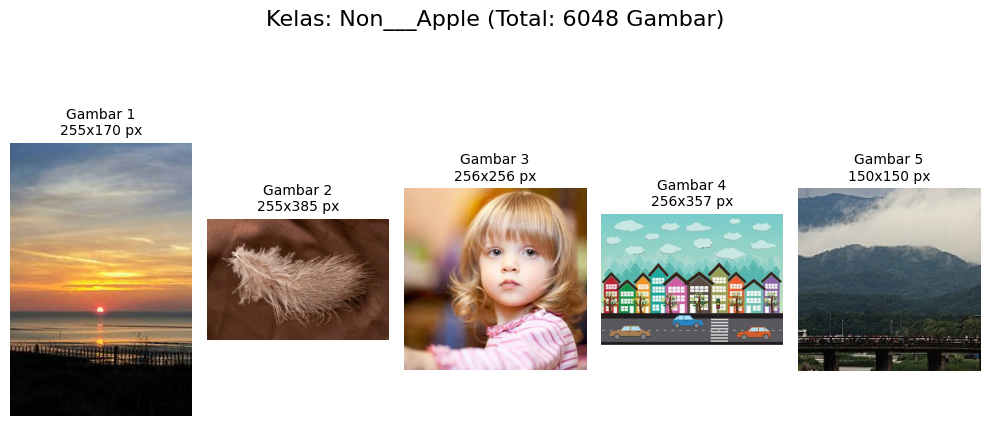


Kelas: Apple___Cedar_apple_rust
Total Gambar: 6048


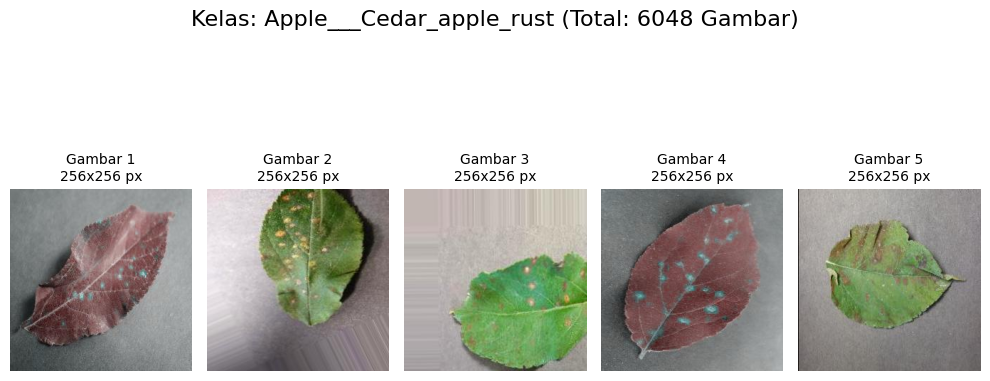


Kelas: Apple___Black_rot
Total Gambar: 6048


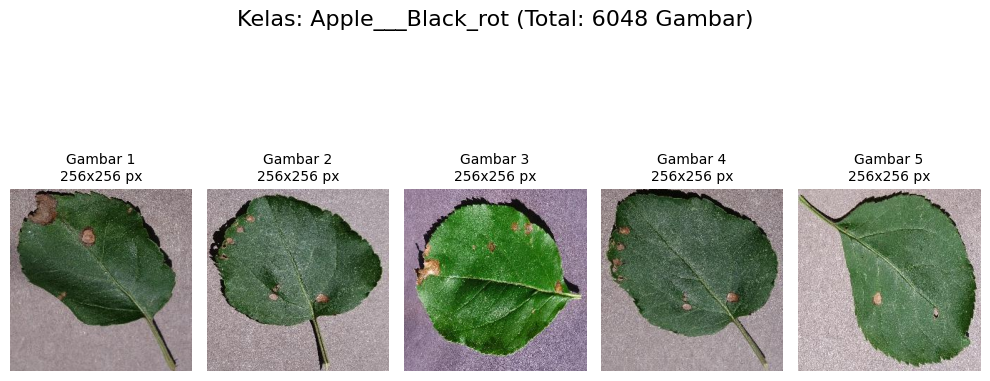


Kelas: Apple___healthy
Total Gambar: 6048


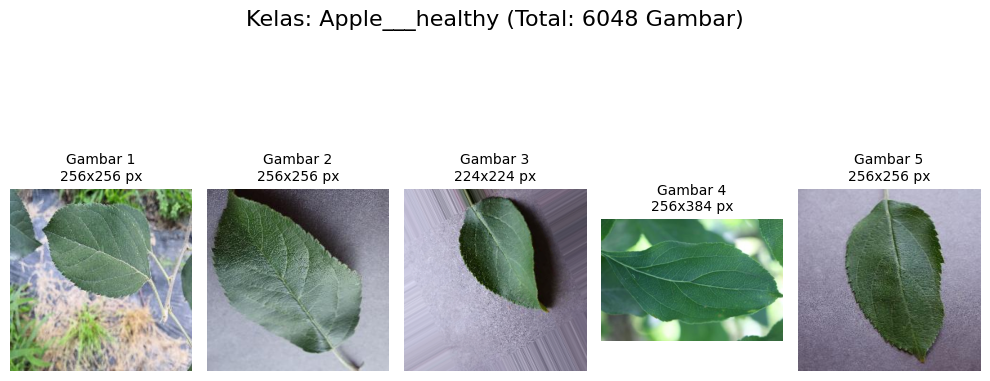


Kelas: Apple___Apple_scab
Total Gambar: 6048


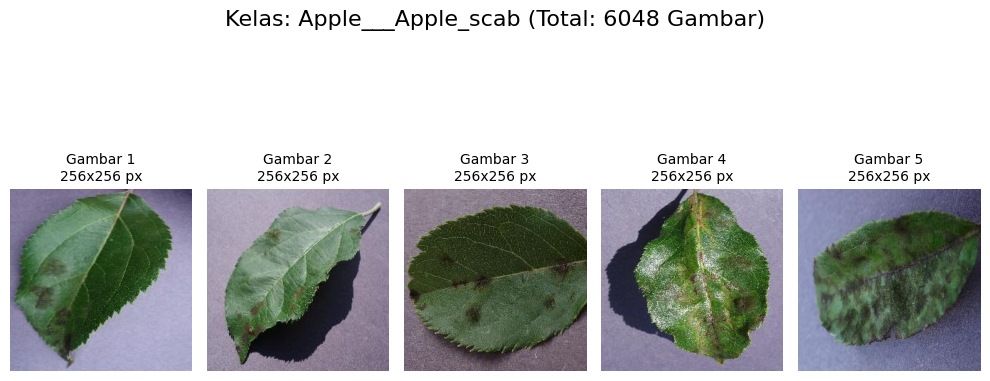

In [ ]:
# Preview Gambar dari Dataset yang Seimbang
print("Preview Gambar dari Dataset yang Seimbang:")

for class_name in apple_classes:
    print(f"\nKelas: {class_name}")

    # Direktori kelas
    class_dir = os.path.join(balanced_dir, class_name)

    # Daftar gambar dalam kelas
    class_images = os.listdir(class_dir)

    # Total gambar dalam kelas
    num_images = len(class_images)
    print(f"Total Gambar: {num_images}")

    # Menampilkan beberapa gambar dari kelas
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Kelas: {class_name} (Total: {num_images} Gambar)", fontsize=16)

    for i, image_file in enumerate(class_images[:5]):  # Menampilkan hingga 5 gambar
        image_path = os.path.join(class_dir, image_file)
        image = mpimg.imread(image_path)

        # Menambahkan subplot untuk setiap gambar
        plt.subplot(1, 5, i + 1)
        plt.axis('off')
        plt.imshow(image)

        # Menambahkan judul deskriptif ke setiap gambar
        plt.title(f"Gambar {i + 1}\n{image.shape[0]}x{image.shape[1]} px", fontsize=10)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Menyesuaikan untuk judul utama
    plt.show()

# SPLIT MODEL


In [ ]:
import random

# Dataset directory and class names
dataset_dir = "/content/balanced"
classes = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Non___Apple"
]

# Ratios for splitting data
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Process each class
for class_name in classes:
    # Define class directory and fetch files
    class_dir = os.path.join(dataset_dir, class_name)
    files = os.listdir(class_dir)
    random.shuffle(files)

    # Calculate split sizes
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    num_val = int(num_files * val_ratio)
    num_test = num_files - num_train - num_val

    # Split files into train, validation, and test sets
    train_files = files[:num_train]
    val_files = files[num_train:num_train + num_val]
    test_files = files[num_train + num_val:]

    # Move files to respective folders
    for folder_name, file_list in [("train", train_files), ("val", val_files), ("test", test_files)]:
        folder_path = os.path.join(dataset_dir, folder_name, class_name)
        os.makedirs(folder_path, exist_ok=True)

        for file in file_list:
            src = os.path.join(class_dir, file)
            dst = os.path.join(folder_path, file)
            shutil.move(src, dst)

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


# Paths for train, validation, and test datasets
train_dir = '/content/balanced/train'
val_dir = '/content/balanced/val'
test_dir = '/content/balanced/test'

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Number of classes
num_classes = len(train_generator.class_indices)


Found 24190 images belonging to 5 classes.
Found 3020 images belonging to 5 classes.
Found 3030 images belonging to 5 classes.


# MODEL

In [ ]:
# Define the base model (MobileNet)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.4)(x)  # Increased dropout
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers for initial training
base_model.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,709 (12.82 MB)

 Trainable params: 131,845 (515.02 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Freeze the base model layers for initial training
base_model.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model (initial training with frozen base)
EPOCHS_INITIAL = 15  # Increased epochs for initial training

history_initial = model.fit(
    train_generator,
    epochs=EPOCHS_INITIAL,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=val_generator.samples // BATCH_SIZE
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


755/755 ━━━━━━━━━━━━━━━━━━━━ 461s 589ms/step - accuracy: 0.7659 - loss: 2.1878 - val_accuracy: 0.9717 - val_loss: 0.5196
Epoch 2/15
  1/755 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8125 - loss: 0.8435

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8125 - loss: 0.8435 - val_accuracy: 1.0000 - val_loss: 0.4744
Epoch 3/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 476s 573ms/step - accuracy: 0.9320 - loss: 0.5389 - val_accuracy: 0.9747 - val_loss: 0.2692
Epoch 4/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3936 - val_accuracy: 0.9167 - val_loss: 0.2750
Epoch 5/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 441s 577ms/step - accuracy: 0.9408 - loss: 0.3395 - val_accuracy: 0.9774 - val_loss: 0.2066
Epoch 6/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.9375 - loss: 0.2853 - val_accuracy: 1.0000 - val_loss: 0.1916
Epoch 7/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 429s 561ms/step - accuracy: 0.9387 - loss: 0.3097 - val_accuracy: 0.9767 - val_loss: 0.2131
Epoch 8/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.9062 - loss: 0.2972 - val_accuracy: 1.0000 - val_loss: 0.2225
Epoch 9/15
755/755 ━━━━━━━━━━━━━━━━━━━━ 440s 560ms/step - accuracy: 0.9411 - loss: 0.2955 - val_accur

In [ ]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Compile the model again with a lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for learning rate reduction and early stopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

# Fine-tune the model
EPOCHS_FINE_TUNE = 25  # Increased epochs for fine-tuning

history_fine_tune = model.fit(
    train_generator,
    epochs=EPOCHS_FINE_TUNE,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=callbacks  # Using callbacks
)


Epoch 1/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 501s 616ms/step - accuracy: 0.7619 - loss: 1.1898 - val_accuracy: 0.9874 - val_loss: 0.1498 - learning_rate: 1.0000e-05
Epoch 2/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3975 - val_accuracy: 1.0000 - val_loss: 0.1173 - learning_rate: 1.0000e-05
Epoch 3/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 448s 586ms/step - accuracy: 0.9698 - loss: 0.2081 - val_accuracy: 0.9920 - val_loss: 0.1348 - learning_rate: 1.0000e-05
Epoch 4/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 113us/step - accuracy: 0.9062 - loss: 0.2615 - val_accuracy: 1.0000 - val_loss: 0.1137 - learning_rate: 1.0000e-05
Epoch 5/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 449s 591ms/step - accuracy: 0.9775 - loss: 0.1782 - val_accuracy: 0.9940 - val_loss: 0.1255 - learning_rate: 1.0000e-05
Epoch 6/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 0s 108us/step - accuracy: 0.9688 - loss: 0.1407 - val_accuracy: 1.0000 - val_loss: 0.1116 - learning_rate: 1.0000e-05
Epoch 7/25
755/755 ━━━━━━━━━━━━━━━━━━━━ 446s 587

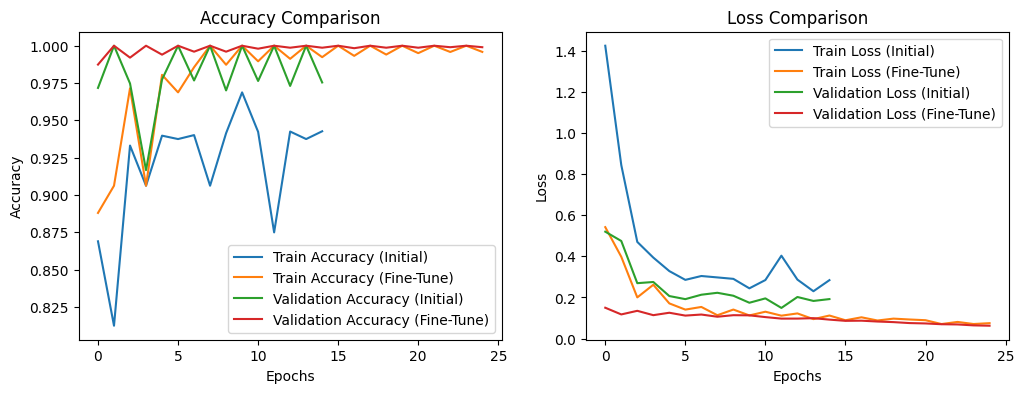

In [ ]:

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_initial.history['accuracy'], label='Train Accuracy (Initial)')
plt.plot(history_fine_tune.history['accuracy'], label='Train Accuracy (Fine-Tune)')
plt.plot(history_initial.history['val_accuracy'], label='Validation Accuracy (Initial)')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy (Fine-Tune)')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_initial.history['loss'], label='Train Loss (Initial)')
plt.plot(history_fine_tune.history['loss'], label='Train Loss (Fine-Tune)')
plt.plot(history_initial.history['val_loss'], label='Validation Loss (Initial)')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss (Fine-Tune)')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


95/95 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step
Fine-Tuned Classification Report:
                           precision    recall  f1-score   support

      Apple___Apple_scab       1.00      1.00      1.00       606
       Apple___Black_rot       1.00      1.00      1.00       606
Apple___Cedar_apple_rust       1.00      1.00      1.00       606
         Apple___healthy       1.00      1.00      1.00       606
             Non___Apple       1.00      1.00      1.00       606

                accuracy                           1.00      3030
               macro avg       1.00      1.00      1.00      3030
            weighted avg       1.00      1.00      1.00      3030



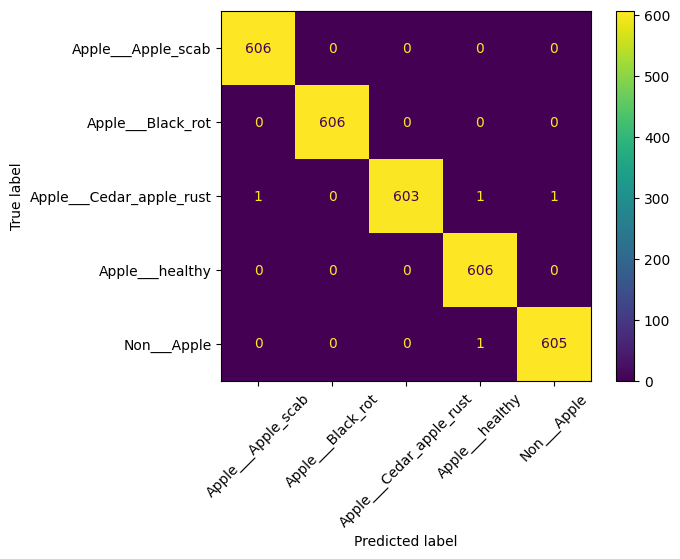

In [ ]:

# Evaluate the fine-tuned model on test data
test_generator.reset()
predictions_fine_tune = model.predict(test_generator)
predicted_classes_fine_tune = np.argmax(predictions_fine_tune, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
report_fine_tune = classification_report(true_classes, predicted_classes_fine_tune, target_names=class_labels)
print("Fine-Tuned Classification Report:\n", report_fine_tune)

# Confusion matrix
cm_fine_tune = confusion_matrix(true_classes, predicted_classes_fine_tune)
disp_fine_tune = ConfusionMatrixDisplay(confusion_matrix=cm_fine_tune, display_labels=class_labels)
disp_fine_tune.plot(cmap='viridis', xticks_rotation=45)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


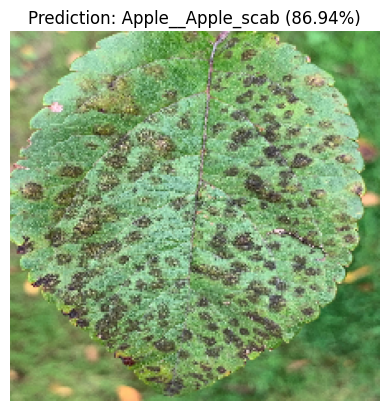

Predicted Class: Apple__Apple_scab
Confidence: 86.94%


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memuat dan memprediksi gambar
def predict_image(img_path, model, class_labels, target_size=(224, 224)):
    """
    Args:
    - img_path: Path ke gambar yang ingin diprediksi.
    - model: Model terlatih yang digunakan untuk prediksi.
    - class_labels: Daftar label kelas.
    - target_size: Ukuran target untuk preprocessing gambar (default: 224x224).

    Returns:
    - Prediksi kelas beserta probabilitasnya.
    """
    # Memuat gambar
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalisasi [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]

    # Tampilkan gambar dan hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class, confidence

# Path ke file gambar
img_path = "/content/apple-scab_03a.jpg"  # Ubah path sesuai lokasi gambar Anda

# Daftar label kelas (sesuaikan dengan model Anda)
class_labels = ["Apple__Apple_scab", "Apple__Black_rot", "Apple__Cedar_apple_rust", "Apple__healthy", "Not__apple"]

# Prediksi menggunakan model
# Pastikan model sudah terdefinisi sebelumnya
predicted_class, confidence = predict_image(img_path, model, class_labels)
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence*100:.2f}%")


# Saved

In [ ]:
model.save("Final_apple_model.h5")

In [ ]:
model.save("Final_apple_model.hdf5")